In [26]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math

N = 50
x_start, x_end = -2.0,2.0
y_start, y_end = -1.0,1.0
x  = np.linspace(x_start,x_end,N)
y =np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [27]:
class Source:
    def __init__(self,strength, x,y):
        """
        sets strength and location of singularity
        
        Parameters
        ------------
        
        strength: float
            strength of source
        x: float
            x-coord of source
        y: float
            y-coord of source
        
        """
        self.strength = strength
        self.x,self.y = x,y
        
    def vel(self,X,Y):
        self.u = (self.strength/(2*np.pi)*
                 (X-self.x)/((X-self.x)**2+(Y-self.y)**2))
        self.v = (self.strength/(2*np.pi)*
                 (Y-self.y)/((X-self.x)**2+(Y-self.y)**2))
    def stream(self,X,Y):
        self.psi = (self.strength / (2 * math.pi) *
                    np.arctan2((Y - self.y), (X - self.x)))

In [28]:
sour_strength = 1.0
x_sour, y_sour = 0.0, 0.5
source = Source(sour_strength,x_sour,y_sour)
source.vel(X,Y)
source.stream(X,Y)

In [29]:
source_mirror = Source(sour_strength, x_sour,-y_sour)
source_mirror.vel(X,Y)
source_mirror.stream(X,Y)

In [30]:
u  = source.u + source_mirror.u
v = source.v + source_mirror.v
psi = source.psi + source_mirror.psi

(-2.0, 2.0000000000000044, -1.0, 1.0000000000000024)

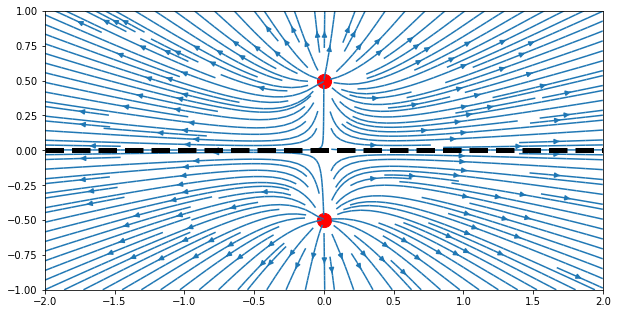

In [31]:
plt.figure(figsize=(10,10))
plt.streamplot(X,Y,u,v,density=2.0)
plt.scatter(source.x,source.y,color='red',s=200)
plt.scatter(source_mirror.x,source_mirror.y,color='red',s = 200)
plt.axhline(0,color='black',linestyle='--',linewidth =5)
plt.axis('scaled')

In [32]:
class Vortex:
    def __init__(self,strength,x,y):
        self.strength = strength
        self.x,self.y = x,y
    def vel(self,X,Y):
        self.u = (+self.strength/(2*np.pi)*
                 (Y-self.y)/((X-self.x)**2+(Y-self.y)**2))
        self.v = (-self.strength/(2*np.pi)*
                 (X-self.x)/((X-self.x)**2+(Y-self.y)**2))
    def stream(self,X,Y):
        self.psi = (-self.strength/(4*np.pi)*
                   np.log((X-self.x)**2+(Y-self.y)**2))

In [33]:
strength_vor =1.0
x_vor,y_vor = 0.0,0.5

vort = Vortex(strength_vor,x_vor,y_vor)
vort.vel(X,Y)
vort.stream(X,Y)

vort_mir = Vortex(-strength_vor,x_vor,-y_vor)
vort_mir.vel(X,Y)
vort_mir.stream(X,Y)

u = vort.u + vort_mir.u
v = vort.v + vort_mir.v
psi = vort.psi + vort_mir.psi

(-2.0, 2.0000000000000044, -1.0, 1.0000000000000024)

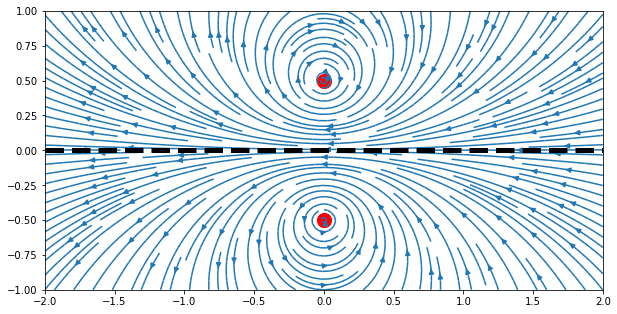

In [34]:
plt.figure(figsize=(10,10))
plt.streamplot(X,Y,u,v,density=2.0)
plt.scatter(source.x,source.y,color='red',s=200)
plt.scatter(source_mirror.x,source_mirror.y,color='red',s = 200)
plt.axhline(0,color='black',linestyle='--',linewidth =5)
plt.axis('scaled')

In [35]:
strength_vor =1.0
x_vort1,y_vort1 = -0.1,0.5
x_vort2, y_vort2= 0.1, 0.5

vort1 = Vortex(+strength_vor,x_vort1,y_vort1)
vort2 = Vortex(-strength_vor,x_vort2,y_vort2)

vort1.vel(X,Y)
vort2.vel(X,Y)
vort1.stream(X,Y)
vort2.stream(X,Y)

vort1_mir=Vortex(-strength_vor,x_vort1,-y_vort1)
vort2_mir=Vortex(+strength_vor,x_vort2,-y_vort2)

vort1_mir.vel(X,Y)
vort2_mir.vel(X,Y)
vort1_mir.stream(X,Y)
vort2_mir.stream(X,Y)

u = vort1.u + vort2.u + vort1_mir.u + vort2_mir.u
v = vort1.v + vort2.v + vort1_mir.v + vort2_mir.v
psi = vort1.psi + vort2.psi + vort1_mir.psi + vort2_mir.psi


(-2.0, 2.0000000000000044, -1.0, 1.0000000000000024)

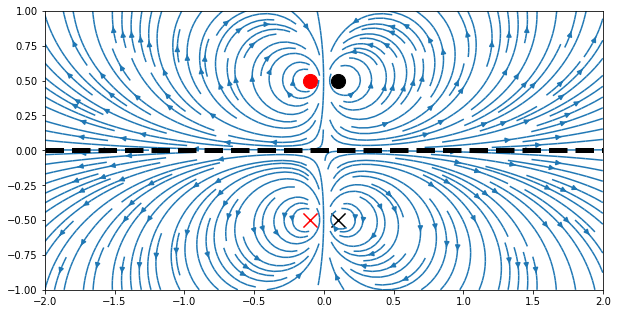

In [36]:
plt.figure(figsize=(10,10))
plt.streamplot(X,Y,u,v,density=2.0)
plt.scatter(vort1.x,vort1.y,color='red',s=200)
plt.scatter(vort2.x,vort2.y,color='black',s = 200)
plt.scatter(vort1_mir.x,vort1_mir.y,color='red',s=200,marker='x')
plt.scatter(vort2_mir.x,vort2_mir.y,color='black',s = 200,marker='x')
plt.axhline(0,color='black',linestyle='--',linewidth =5)
plt.axis('scaled')

In [45]:
u_inf = 1.0

u_freestream = u_inf*np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N),dtype=float)

psi_freestream = u_inf*Y



In [46]:
class Doublet:
    def __init__(self,strength, x,y):
        self.strength = strength
        self.x,self.y = x,y
        
    def vel(self, X,Y):
        self.u = (-strength/(2*np.pi)*
                 ((X-self.x)**2 - (Y-self.y)**2)/
                 ((X-self.x)**2+(Y-self.y)**2)**2)
        self.v = (-strength/(2*np.pi)*
                 2*(X- self.x)*(Y-self.y)/
                 ((X-self.x)**2+(Y-self.y)**2)**2)
    def stream(self,X,Y):
        
        self.psi = (-self.strength/(2*np.pi)*
                   (Y-self.y)/ ((X-self.x)**2 + (Y -self.y)**2))
        

(-2.0, 2.0000000000000044, -1.0, 1.0000000000000024)

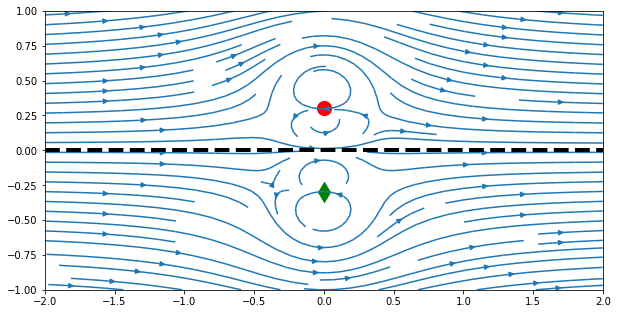

In [54]:
strength = 1.0
x_d, y_d = 0.0,0.3
doublet =Doublet(strength,x_d, y_d)

doublet.vel(X,Y)
doublet.stream(X,Y)

doub_image = Doublet(strength,x_d,-y_d)
doub_image.vel(X,Y)
doub_image.stream(X,Y)


u = u_freestream + doublet.u + doub_image.u
v= v_freestream + doublet.v + doub_image.v
psi =psi_freestream + doublet.psi + doub_image.psi

plt.figure(figsize=(10,10))
plt.streamplot(X,Y, u, v)
plt.scatter(doublet.x,doublet.y,color = 'red',s= 200)
plt.scatter(doub_image.x,doub_image.y,color='green',s =200, marker='d')
plt.axhline(0,linestyle='--',color ='black',linewidth = 4)
plt.axis('scaled')

